# KCON Thailand

![an artist who join "KCON Thailand 2019"](img\header.png)

# Import necessary library

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import emoji

# Read data 01/09/2019

In [2]:
tweets_data = []
tweets_data_path = 'new_data.txt'

tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
print(len(tweets_data))

7884


# Reformat time and convert UTC To THAI time zone

In [3]:
from datetime import datetime, timezone
import pytz

In [4]:
thai_tz = pytz.timezone('Asia/Bangkok') # thai time zone

In [5]:
# find error
lst_error = []
for i in range(len(tweets_data)):
    try:
        tweets_data[i]['created_at'].split(' ')
    except:
        lst_error.append(i)

In [6]:
print(lst_error)

[]


In [7]:
day = []
for i in range(len(tweets_data)):
    if i not in lst_error:
        lst = tweets_data[i]['created_at'].split(' ')
        tweets_data[i]['id'] = lst[0] # เก็บวันไวเในช่อง id
        date = (lst[5]+'.'+lst[1]+'.'+lst[2]+' '+lst[3])
        date_time = datetime.strptime(date, '%Y.%b.%d %H:%M:%S')
        tweets_data[i]['created_at'] =  date_time.replace(tzinfo=timezone.utc).astimezone(thai_tz) # reset info and convert to thai timezone
#         thai_time.strftime('%Y-%m-%d %H:%M:%S') # return time format yyyy-mm-dd hh:mm:ss
#         print(tweets_data[i]['created_at'])
#     else:
#         print(i)

# Test area

In [8]:
for i in range(len(tweets_data)):
    try:
        check = tweets_data[i]['created_at']
    except:
        print(i)

In [9]:
time = [tweets_data[i]['created_at'] for i in range(len(tweets_data)) if i not in lst_error]
language = [tweets_data[i]['lang'] for i in range(len(tweets_data)) if i not in lst_error]
text =[tweets_data[i]['text'] for i in range(len(tweets_data)) if i not in lst_error]
day = [tweets_data[i]['id'] for i in range(len(tweets_data)) if i not in lst_error]

In [10]:
df = pd.DataFrame({'time':time, 'day':day, 'language':language, 'text':text})

In [11]:
tweets_data[10]

{'created_at': datetime.datetime(2019, 9, 1, 0, 58, 2, tzinfo=<DstTzInfo 'Asia/Bangkok' +07+7:00:00 STD>),
 'id': 'Sat',
 'id_str': '1167859102652846080',
 'text': 'RT @KCONThailand: [#KCON2019THAILAND]\n@ATEEZofficial came by to give future Cover Stars some tips! Check out what they have prepared for yo…',
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 2888664328,
  'id_str': '2888664328',
  'name': 'Marie🇨🇦',
  'screen_name': 'LemieuxEve',
  'location': 'Canada',
  'url': None,
  'description': 'I am myself💜',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 98,
  'friends_count': 1422,
  'listed_count': 0,
  'favourites_count': 9388,
  'statuses_count': 489,
  'created_at': 'Sun Nov 23 01:07

In [12]:
df.tail(5)

,time,day,language,text
7879,2019-09-01 23:54:44+07:00,Sun,th,RT @yoTamStyle: แจก!‼ ฉลองเปิดร้าน🎉🎉🎉🎉\nบัตร #...
7880,2019-09-01 23:54:49+07:00,Sun,en,RT @KCONThailand: [#KCON2019THAILAND ]\nHappy ...
7881,2019-09-01 23:55:14+07:00,Sun,th,RT @yoTamStyle: แจก!‼ ฉลองเปิดร้าน🎉🎉🎉🎉\nบัตร #...
7882,2019-09-01 23:55:16+07:00,Sun,th,มีใครสนใจหารกันมั้ยคะ เราเอาวันเสาร์ คนละ2500ค...
7883,2019-09-01 23:55:28+07:00,Sun,th,คือซื้อบัตรคอมโบมา แล้วซื้อมีทแบบวันเดย์พาสแล้...


In [13]:
df['language'].value_counts()

th     6439
en     1125
und     244
ko       28
tl       12
in        9
vi        7
eu        6
ja        6
es        4
et        1
tr        1
ar        1
pt        1
Name: language, dtype: int64

In [14]:
tweets_data[700]

{'created_at': datetime.datetime(2019, 9, 1, 6, 53, 5, tzinfo=<DstTzInfo 'Asia/Bangkok' +07+7:00:00 STD>),
 'id': 'Sat',
 'id_str': '1167948455269978113',
 'text': 'RT @KCONThailand: [#KCON2019THAILAND]\nLove Call สำหรับ ONE IT พิกกี้บูบู้ของ #X1\nตอบรับกันตอนนี้เลย!\n\nการพบกันครั้งแรกของ X1 และ ONE IT ➤ h…',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1115108934887530496,
  'id_str': '1115108934887530496',
  'name': 'Wannable |คุณแดนกลับมาแล้ว😙❤|',
  'screen_name': 'Wannabl80850991',
  'location': None,
  'url': None,
  'description': 'WannaOne Forever\nWannable💛แดเนียลผู้กุมหัวใจ❤\nEXO💛EXO-L❤ทาสปะดิ้วเมนทุกคน😂\n💕 เก็บตังค์ไปคอน#dek63 \n#หลินหลินเบอร์สุ่ม #หลินหลินแจก #รีวิวหลินหลินเบอร์สุ่ม',
  'translator_type': 'none',
  'prote

In [15]:
hashtag = []
for j in range(len(tweets_data)):
    if j not in lst_error:
        for i in range(len(tweets_data[j]['entities']['hashtags'])):
            hashtag.append(tweets_data[j]['entities']['hashtags'][i]['text'].upper())
#           print(tweets_data[j]['entities']['hashtags'][i]['text'])

In [16]:
print(len(tweets_data))

7884


In [17]:
len(hashtag)

15782

In [18]:
hashtag_df = pd.DataFrame({'hashtag':hashtag})

In [19]:
hashtag_df['hashtag'].value_counts().head(50)

KCON2019THAILAND                 5221
X1                               1734
KCON19TH                         1371
IZONE                             801
YUJIN                             729
IZONE_KCON                        729
KCONTHAILAND2019                  631
GOT7                              463
GOT7FANFESTINBKK                  427
THEBOYZ                           309
KCON                              105
STRAYKIDS                          91
EXPLORATIONINBKK                   90
ATEEZ                              83
โพลาลอยด์                          80
X1_FLAϞH                           70
COVERSTARK                         65
ONEIT                              56
ตลาดนัดอากาเซ่                     53
ปรมาจารย์ลัทธิมารTHFANMEETING      51
ตลาดนัดX1                          50
AB6IX1STFMINBKK                    46
สุ่มแจก                            45
BOYSTORY                           43
X1_KCON                            40
วันอิท                             39
BDJINYOUNG  

In [20]:
bins = list(range(0, 25*3600, 2*3600)) # แบ่งช่วงละ 2 ชั่วโมงและแปลงช่วงเป็นวินาที
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24'] # กำหนด label ของช่วง
# print(list(range(0, 25, 2)))
bins

[0,
 7200,
 14400,
 21600,
 28800,
 36000,
 43200,
 50400,
 57600,
 64800,
 72000,
 79200,
 86400]

In [21]:
list(range(0, 25*3600, 1*3600))
bins = list(range(0, 25*3600, 1*3600)) # แบ่งช่วงละ 2 ชั่วโมงและแปลงช่วงเป็นวินาที
labels = ['0 pm','1 am','2 am','3 am','4 am',
          '5 am','6 am','7 am','8 am','9 am',
          '10 am','11 am','12 am','13 pm','14 pm',
          '15 pm','16 pm','17 pm','18 pm','19 pm',
          '20 pm','21 pm','22 pm','23 pm'] # กำหนด label ของช่วง
# print(list(range(0, 25, 2)))
bins

[0,
 3600,
 7200,
 10800,
 14400,
 18000,
 21600,
 25200,
 28800,
 32400,
 36000,
 39600,
 43200,
 46800,
 50400,
 54000,
 57600,
 61200,
 64800,
 68400,
 72000,
 75600,
 79200,
 82800,
 86400]

In [22]:
df['sec'] = df.time.dt.hour * 3600 + df.time.dt.minute*60 + df.time.dt.second

In [23]:
df.head()

,time,day,language,text,sec
0,2019-09-01 00:55:43+07:00,Sat,th,RT @vyz_wa: 0593939111 กสิกร \nน.ส. ศรีสุดา ธน...,3343
1,2019-09-01 00:56:33+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND] UPDATED ...,3393
2,2019-09-01 00:56:35+07:00,Sat,th,RT @wjs_tarn: บน!! ถ้าหาบัตรดอยวันเสาร์ในราคา ...,3395
3,2019-09-01 00:56:41+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...,3401
4,2019-09-01 00:57:13+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nมา D.D....,3433


In [24]:
df['group'] = pd.cut(df['sec'], bins=bins, labels=labels)

# Time plot

Text(0, 0.5, 'number of tweets')

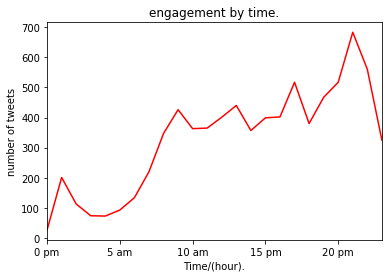

In [25]:
fig = plt.figure()
p = df.groupby('group').count()['time'].plot(color='red')
p.set_title('engagement by time.')
p.set_xlabel('Time/(hour).')
p.set_ylabel('number of tweets')

Text(0, 0.5, 'number of tweets')

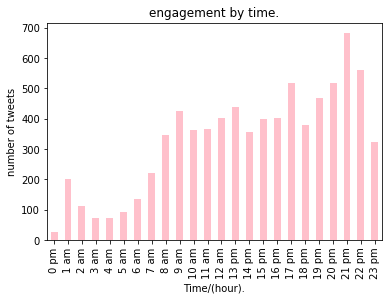

In [26]:
fig = plt.figure()
p = df.groupby('group').count()['time'].plot.bar(color='pink')
p.set_title('engagement by time.')
p.set_xlabel('Time/(hour).')
p.set_ylabel('number of tweets')

# ภาษาที่ใช้ในการพูดถึง 5 อันดับแรก

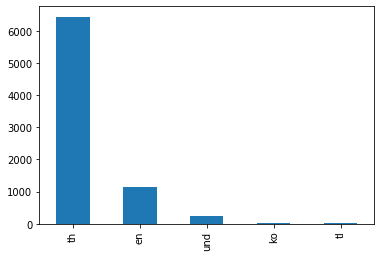

In [32]:
df['language'].value_counts()[:5].plot.bar()

In [ ]:
# th : thailand
# en : english
# und : undefind
# ko

# Arthist hashtag

In [ ]:
boystory = hashtag.count('BOYSTORY')
everglow = hashtag.count('EVERGLOW')
goldenchild = hashtag.count('GOLDENCHILD') + hashtag.count('GOLDEN_CHILD')
got7 = hashtag.count('GOT7')
itzy = hashtag.count('ITZY')
kimjaehwan = hashtag.count('KIMJAEHWAN') + hashtag.count('คิมแจฮวาน')
nature = hashtag.count('NATURE')
oneus = hashtag.count('ONEUS')
theboyz = hashtag.count('THEBOYZ')
x1 = hashtag.count('X1')
nichkhun = hashtag.count('NICHKHUN') + hashtag.count('นิชคุณ')
gidle = hashtag.count('G_I_DLE') + hashtag.count('GIDLE')
ab6ix = hashtag.count('AB6IX')
ateez = hashtag.count('ATEEZ')
bvndit = hashtag.count('BVNDIT')
chungha = hashtag.count('CHUNGHA')
izone = hashtag.count('IZONE')
straykids = hashtag.count('STRAYKIDS')
varivary = hashtag.count('VERIVERY')

In [ ]:
artist = ['BOYSTORY', 'EVERGLOW', 'GOLDENCHILD', 'GOT7', 'ITZY', 'KIMJAEHWAN', 'NATURE', 'ONEUS', 'THEBOYZ', 'X1', 'NICHKHUN', 'G_I_DLE', 'AB6IX', 'ATEEZ', 'BVNDIT', 'CHUNGHA', 'IZONE', 'STRAYKIDS', 'VERIVERY']
hashtag_count = [boystory, everglow, goldenchild, got7, itzy, kimjaehwan, nature, oneus, theboyz, x1, nichkhun, gidle, ab6ix, ateez, bvndit, chungha, izone, straykids, varivary]
artist_df = pd.DataFrame({'artist':artist, 'hashtag_count':hashtag_count})
artist_df = artist_df.set_index('artist')

In [ ]:
artist_df.sort_values(by=['hashtag_count'], ascending=False)['hashtag_count'].plot.bar()

# Log nomalized

In [ ]:
import numpy as np
import pandas as pd

artist_df['lognorm'] = np.log10(1+artist_df['hashtag_count'])

In [ ]:
# artist_df['lognorm'].plot.bar()

In [ ]:
artist_df.sort_values(by=['lognorm'], ascending=False)['lognorm'].plot.bar()

In [ ]:
hashtag.count('ITZY')

In [ ]:
artist_df

# Tweet info

In [ ]:
alltext = []

try:
    for i in range(len(tweets_data)):
        if re.search('^RT' ,tweets_data[i]['text']):
            if re.search('…$' ,tweets_data[i]['text']):
                try:
                    text = tweets_data[i]['retweeted_status']['extended_tweet']['full_text']
                    alltext.append(text)
                    
                    print(text)
                    print('--------------------')
                except:
                    text = tweets_data[i]['retweeted_status']['text']
                    alltext.append(text)
                    
                    print(text)
                    print('--------------------')
            else:
                text = tweets_data[num_check]['retweeted_status']['text']
                alltext.append(text)
                
                print(text)
                print('--------------------')
        else:
            if re.search('…' ,tweets_data[i]['text']):
                text = tweets_data[i]['extended_tweet']['full_text']
                alltext.append(text)
                
                print(text)
                print('--------------------')
            else:
                text = tweets_data[i]['text']
                alltext.append(text)
                
                print(text)
                print('--------------------')
except:
    print(f'**********\n**********\n**********\n{i}**********\n**********\n**********\n')

In [ ]:
alltext

# Emoji

In [ ]:
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.UNICODE_EMOJI)

In [ ]:
emo = []

In [ ]:
for i in range(len(alltext)):
    if extract_emojis(alltext[i]) != '':
        emo.append(extract_emojis(alltext[i]))

In [ ]:
emo

In [ ]:
text_emo = ''
for i in emo:
    text_emo += i

In [ ]:
print(text_emo)

In [ ]:
emoji_df = pd.DataFrame({'emoji':[i for i in text_emo]})

In [ ]:
show = emoji_df['emoji'].value_counts()

In [ ]:
show.head(20)